#  Support Vector Machine

Support Vector Machines (SVM) are utilized in stock price prediction by leveraging historical stock data. This involves selecting and engineering relevant features, such as technical indicators, and labeling the data to indicate future price movements. The dataset is split into training and testing sets, and features are scaled for uniformity. SVM models, employing different kernel functions based on data characteristics, are then trained on the training set. The trained model is evaluated on the testing set to assess its predictive performance. SVMs are valued for their ability to handle non-linear relationships and make them applicable to stock price forecasting.

I have used SVM for both regression and classification task

# Classifier

In [1]:
#import necessary libraries
import yfinance as yf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Fetch data
start_date = '2012-01-01'
end_date = '2022-12-31'
stock_symbol = 'TSLA'
df = yf.download(stock_symbol, start=start_date, end=end_date, auto_adjust=True)


[*********************100%***********************]  1 of 1 completed


In [3]:
# Generate target values
df['returns'] = np.log(df['Close'] / df['Close'].shift(1))
df['target'] = np.where(df['Open'].shift(-1) > df['Open'], 1, 0)
df['Volume'] = df['Volume'].shift(1)
df.dropna(inplace=True)


In [4]:
# Feature selection
features_list = ['Volume', 'returns']

# Feature extraction
for i in range(5, 20, 5):
    col_name = 'std_' + str(i)
    df[col_name] = df['Close'].rolling(window=i).std()
    features_list.append(col_name)

for i in range(10, 30, 5):
    col_name = 'ma_' + str(i)
    df[col_name] = df['Close'].rolling(window=i).mean()
    features_list.append(col_name)

for i in range(3, 12, 3):
    col_name = 'pct_' + str(i)
    df[col_name] = df['Close'].pct_change().rolling(i).sum()
    features_list.append(col_name)

col_name = 'vma_4'
df[col_name] = df['Volume'].rolling(4).mean()
features_list.append(col_name)

col_name = 'co'
df[col_name] = df['Close'] - df['Open']
features_list.append(col_name)

In [5]:
df.dropna(inplace=True)

In [6]:
# Generate train-test datasets
X = df[features_list].iloc[:-1]
y = df.iloc[:-1]['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)


In [7]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Build model
model = SVC(kernel='poly', random_state=1)

In [9]:
# Train model
model.fit(X_train_scaled, y_train)

SVC(kernel='poly', random_state=1)

In [10]:
# Predict
y_pred_train = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)


In [11]:
# Evaluate model
print('Model accuracy on training data:', accuracy_score(y_train, y_pred_train))
print('Model accuracy on testing data:', accuracy_score(y_test, y_pred))

Model accuracy on training data: 0.7660505836575876
Model accuracy on testing data: 0.8090379008746356


Confusion Matrix:
[[305  31]
 [100 250]]


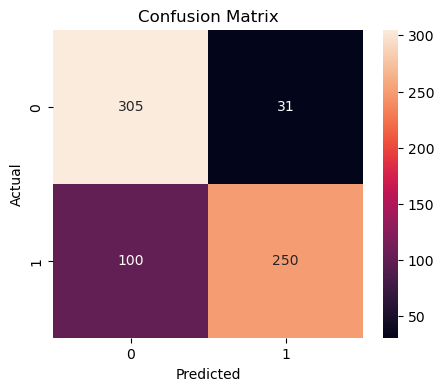

In [12]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
print('Classification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       336
           1       0.89      0.71      0.79       350

    accuracy                           0.81       686
   macro avg       0.82      0.81      0.81       686
weighted avg       0.82      0.81      0.81       686



# Regressor

In [14]:
#import necessary libraires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf


In [15]:
# Download historical data
start_date = '2012-01-01'
end_date = '2022-12-31'
stock_symbol = 'TSLA'

df = yf.download(stock_symbol, start=start_date, end=end_date, auto_adjust=True)


[*********************100%***********************]  1 of 1 completed


In [16]:
# Generate target values
df['returns'] = np.log(df['Close'] / df['Close'].shift(1))
df['target'] = df['Open'].shift(-1)
df['Volume'] = df['Volume'].shift(1)
df.dropna(inplace=True)


In [17]:

# Feature selection
features_list = []

# Feature extraction
for i in range(5, 20, 5):
    col_name = 'std_' + str(i)
    df[col_name] = df['Close'].rolling(window=i).std()
    features_list.append(col_name)

for i in range(10, 30, 5):
    col_name = 'ma_' + str(i)
    df[col_name] = df['Close'].rolling(window=i).mean()
    features_list.append(col_name)

for i in range(3, 12, 3):
    col_name = 'pct_' + str(i)
    df[col_name] = df['Close'].pct_change().rolling(i).sum()
    features_list.append(col_name)

col_name = 'vma_4'
df[col_name] = df['Volume'].rolling(4).mean()
features_list.append(col_name)

col_name = 'co'
df[col_name] = df['Close'] - df['Open']
features_list.append(col_name)

In [18]:

df.dropna(inplace=True)

In [19]:
# Generate train-test datasets
X = df[features_list].iloc[:-1]
y = df.iloc[:-1]['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [20]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
# Build model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)


In [22]:

# Train model
model.fit(X_train_scaled, y_train)


SVR()

In [23]:

# Predict
y_pred_train = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

In [24]:

# Evaluate model
print('Mean Squared Error on training data:', mean_squared_error(y_train, y_pred_train))
print('Mean Squared Error on testing data:', mean_squared_error(y_test, y_pred))

print('R-squared Score on training data:', r2_score(y_train, y_pred_train))
print('R-squared Score on testing data:', r2_score(y_test, y_pred))


Mean Squared Error on training data: 13.506341882215564
Mean Squared Error on testing data: 48532.63481427542
R-squared Score on training data: 0.7986910828888963
R-squared Score on testing data: -5.851427539104147
